### Numpy array vs Python lists

In [1]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time 

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

2.092024564743042


In [2]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.16426730155944824


In [3]:
# times faster 
2.28766/0.020948

109.20660683597478

In [4]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

81528056

In [5]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000096

In [6]:
# convenience

### Advanced Indexing

In [7]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [8]:
a[1,2]

6

In [9]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [10]:
# Fancy Indexing

a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [11]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[ 5, 47, 56, 80],
       [39, 33,  1, 59],
       [71, 95, 24, 21],
       [59, 74, 69, 43],
       [60, 27, 35, 15],
       [54, 65, 97, 28]])

In [12]:
# find all numbers greater than 50
a[a > 50]

array([56, 80, 59, 71, 95, 59, 74, 69, 60, 54, 65, 97])

In [13]:
# find out even numbers
a[a % 2 == 0]

array([56, 80, 24, 74, 60, 54, 28])

In [14]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]

array([56, 80, 74, 60, 54])

In [15]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([ 5, 47, 80, 39, 33,  1, 59, 71, 95, 24, 59, 74, 69, 43, 60, 27, 15,
       54, 65, 97])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [16]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [17]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print("+++++++")
print(b)



[[0 1 2]
 [3 4 5]]
+++++++
[[0 1 2]]


In [18]:
print(a+b)

[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [19]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [20]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print("++++++")
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
++++++
[0 1 2]


In [21]:

print(a+b) 

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [22]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print("#########")
print(b)

[[0 1 2]]
#########
[[0]
 [1]
 [2]]


In [23]:
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [24]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print()
print(b)

[[0 1 2]]

[[0]
 [1]
 [2]
 [3]]


In [25]:
print(a + b)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [26]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [27]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [28]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [41]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [33]:
# sigmoid
def sigmoid(array):return 1/(1 + np.exp(-(array)))
a = np.arange(100)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [30]:
# mean squared error
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [34]:
def mse(actual,predicted):return np.mean((actual - predicted)**2)
mse(actual,predicted)

423.88

In [35]:
# binary cross entropy


423.88

In [36]:
actual

array([ 6, 31,  9, 42,  5, 39, 44, 17, 38, 27, 16,  1, 26, 39, 45, 41, 16,
       30, 16, 34, 24, 33, 35,  4, 18])

### Working with missing values

In [37]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [38]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

In [39]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

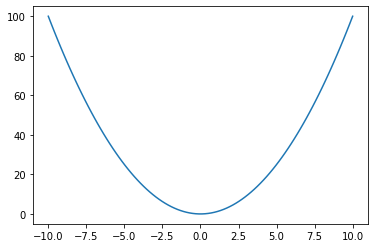

In [40]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

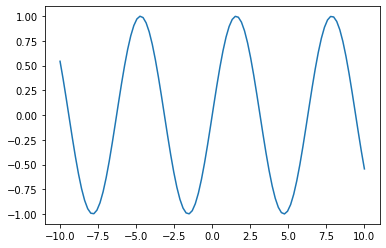

In [41]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


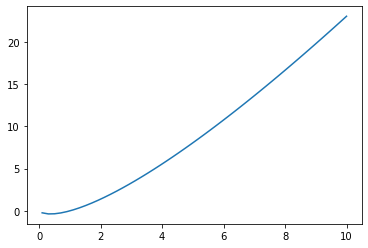

In [42]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

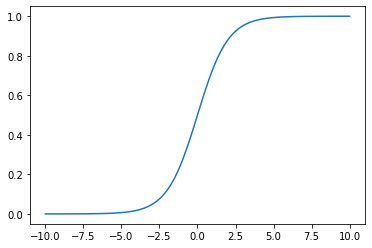

In [43]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

### Meshgrids

In [44]:
# Meshgrids